## Construção do Modelo de Machine Learning

Nesta segunda fase, iniciamos o coração do nosso projeto: a análise dos dados e a construção do modelo preditivo. O objetivo é transformar os dados brutos de pesquisa de satisfação em um modelo inteligente capaz de prever se um passageiro ficará satisfeito ou não.

Todo o desenvolvimento desta fase será realizado em um ambiente interativo (Jupyter Notebook), que é ideal para análise, experimentação e visualização de dados.

### 1. Carregamento e Exploração Inicial dos Dados (EDA)

O primeiro passo de qualquer projeto de Ciência de Dados é fazer um contato inicial com os dados. Precisamos "sentir" os dados, entender sua estrutura, seu tamanho, os tipos de informação que contêm e, crucialmente, identificar problemas preliminares como valores ausentes ou inconsistências.

### O que Este Código Faz?

1.  **Importação do Pandas:**
    * Importamos a biblioteca `pandas`, que é a ferramenta padrão em Python para manipulação e análise de dados tabulares.

2.  **Carregamento dos Dados (`.read_csv()`):**
    * Carregamos o arquivo `train.csv` para um **DataFrame**, que é a estrutura de dados principal do Pandas, semelhante a uma planilha ou tabela de banco de dados.

3.  **Inspeção da Estrutura (`.info()`):**
    * O método `.info()` nos fornece um resumo técnico do DataFrame. Ele é essencial para verificarmos:
        * O número total de registros (linhas) e colunas.
        * O nome e o tipo de dado (`Dtype`) de cada coluna.
        * A contagem de valores não-nulos, o que nos permite identificar rapidamente quais colunas têm dados faltantes.

4.  **Amostra dos Dados (`.head()`):**
    * Exibimos as cinco primeiras linhas do DataFrame para ter uma visão qualitativa dos dados e entender como as informações estão dispostas.

5.  **Resumo Estatístico (`.describe()`):**
    * Para todas as colunas numéricas, o método `.describe()` calcula estatísticas descritivas fundamentais, como média, desvio padrão, mediana (quartil 50%), mínimo e máximo. Isso nos ajuda a entender a escala e a distribuição de cada variável numérica.

6.  **Contagem de Nulos (`.isnull().sum()`):**
    * Este comando foca em um dos problemas mais comuns: dados ausentes. Ele conta, para cada coluna, quantos valores são nulos (`NaN`). Este é o primeiro passo para definirmos nossa estratégia de limpeza de dados.

In [21]:
import pandas as pd

# Carregar o arquivo train.csv para um DataFrame
# O '.. ' indica para voltar um diretório (da pasta /notebooks para a raiz)
df = pd.read_csv('../data/train.csv')

# Exibir informações gerais sobre o DataFrame
print("--- Informações Gerais (df.info()) ---")
df.info()

# Exibir as 5 primeiras linhas
print("\n--- 5 Primeiras Linhas (df.head()) ---")
print(df.head())

# Exibir um resumo estatístico das colunas numéricas
print("\n--- Resumo Estatístico (df.describe()) ---")
print(df.describe())

# Exibir a contagem de valores nulos por coluna
print("\n--- Contagem de Valores Nulos (df.isnull().sum()) ---")
print(df.isnull().sum())

--- Informações Gerais (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  

### 2. Análise Exploratória Visual (EDA) - Parte 1

Após a inspeção inicial, o próximo passo é a **visualização de dados**. Gráficos nos permitem entender a distribuição das variáveis e o perfil dos passageiros de uma forma muito mais intuitiva do que tabelas de números.

Nesta primeira parte da análise visual, focaremos na **análise univariada**, que significa analisar cada variável de forma independente para entender suas características individuais.

### O que Este Código Faz?

1.  **Configuração do Ambiente Visual:**
    * Importamos as bibliotecas `matplotlib` e `seaborn`, que são as principais ferramentas para visualização de dados em Python.
    * Definimos um tamanho de figura grande (`figsize`) e um estilo (`whitegrid`) para garantir que nossos gráficos sejam legíveis e esteticamente agradáveis.
    * Usamos `plt.subplot()` para organizar múltiplos gráficos em uma única visualização, facilitando a comparação.

2.  **Análise de Variáveis Numéricas:**
    * **Histograma de Idade:** O histograma nos mostra a frequência de passageiros em diferentes faixas etárias. A linha `kde` (Kernel Density Estimate) suaviza o histograma para nos dar uma ideia da forma da distribuição.
    * **Boxplot de Distância de Voo:** O boxplot é ideal para identificar a mediana (a linha central da caixa), os quartis (os limites da caixa) e os *outliers* (pontos individuais) de uma variável numérica. Ele nos dá um resumo rápido da dispersão dos dados.

3.  **Análise de Variáveis Categóricas:**
    * **Gráfico de Contagem por Classe:** O `countplot` é um gráfico de barras que exibe a contagem total de passageiros para cada categoria de uma variável (neste caso, `Business`, `Eco`, `Eco Plus`). Ordenamos as barras pela contagem para facilitar a leitura.
    * **Gráfico de Contagem por Satisfação:** Este é um dos gráficos mais importantes, pois visualiza a nossa variável alvo. Ele nos mostra a proporção entre passageiros "satisfeitos" e "neutros ou insatisfeitos", nos ajudando a entender o balanceamento das classes que o nosso modelo precisará prever.

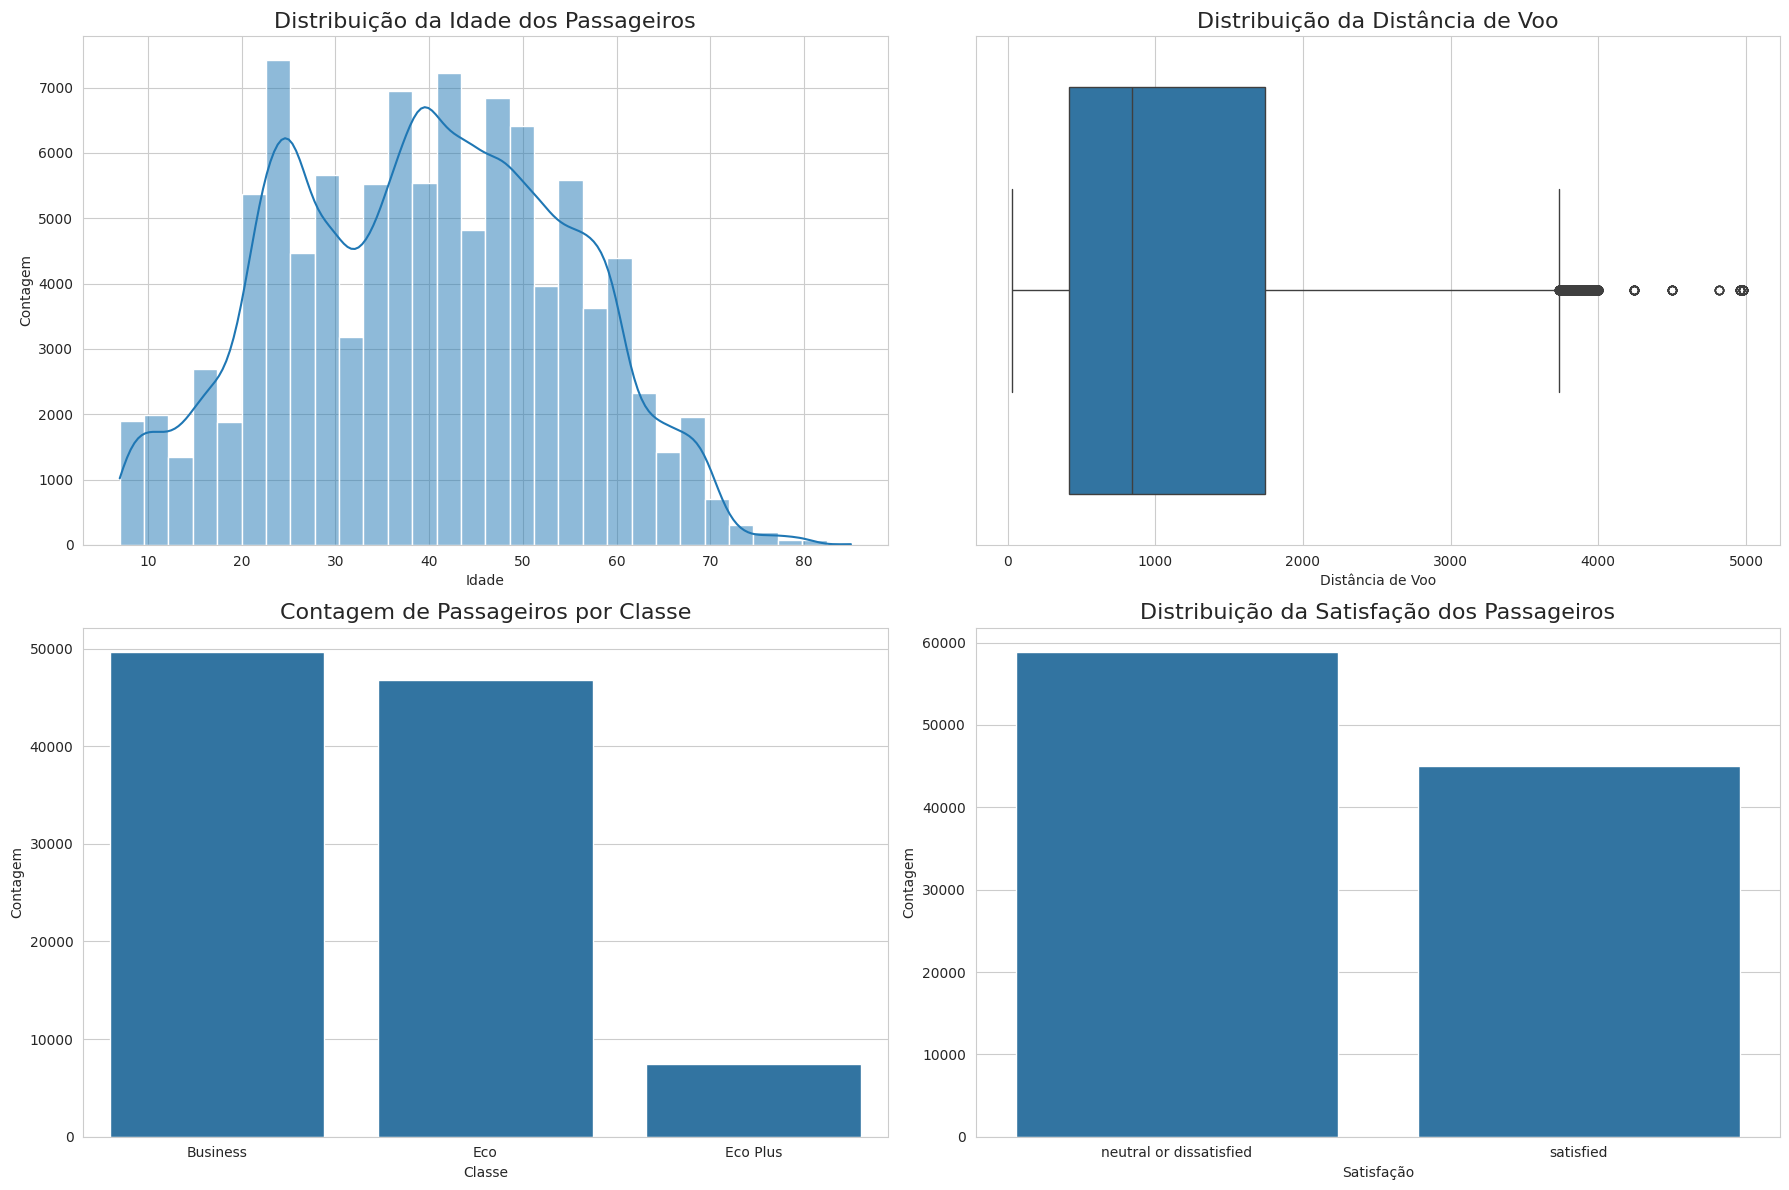

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização dos gráficos
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))

# --- Bloco 1: Análise Univariada Numérica ---

# Gráfico 1: Histograma da Idade (Age)
plt.subplot(2, 2, 1) # Cria uma grade 2x2 e seleciona a 1ª posição
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribuição da Idade dos Passageiros', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Gráfico 2: Boxplot da Distância de Voo (Flight Distance)
plt.subplot(2, 2, 2) # Seleciona a 2ª posição
sns.boxplot(x=df['Flight Distance'])
plt.title('Distribuição da Distância de Voo', fontsize=16)
plt.xlabel('Distância de Voo')


# --- Bloco 2: Análise Univariada Categórica ---

# Gráfico 3: Contagem por Classe de Voo
plt.subplot(2, 2, 3) # Seleciona a 3ª posição
sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index)
plt.title('Contagem de Passageiros por Classe', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Gráfico 4: Contagem por Satisfação (Nossa Variável Alvo)
plt.subplot(2, 2, 4) # Seleciona a 4ª posição
sns.countplot(x='satisfaction', data=df)
plt.title('Distribuição da Satisfação dos Passageiros', fontsize=16)
plt.xlabel('Satisfação')
plt.ylabel('Contagem')

# Ajusta o layout para evitar sobreposição dos títulos
plt.tight_layout()
# Exibe os gráficos
plt.show()

### 3. Análise Exploratória Visual (EDA) - Parte 2

Após entendermos as variáveis de forma isolada, o próximo passo é a **análise bivariada e multivariada**. O objetivo aqui é começar a investigar as relações *entre* as variáveis, com um foco especial em como as características dos passageiros e dos voos se relacionam com a nossa variável alvo, a `satisfaction`.

#### Análise Bivariada

Nesta análise, cruzamos variáveis categóricas com a variável de satisfação para identificar visualmente quais grupos de passageiros tendem a estar mais ou menos satisfeitos.

#### Análise de Correlação

A análise de correlação nos ajuda a entender as relações lineares entre as variáveis **numéricas**. Um heatmap (mapa de calor) é a forma ideal de visualizar a matriz de correlação, onde cores quentes (vermelho) indicam uma correlação positiva forte e cores frias (azul) indicam uma correlação negativa forte.

### O que Este Código Faz?

1.  **Gráficos de Contagem Agrupados (`countplot` com `hue`):**
    * Criamos três gráficos de barras para analisar a satisfação dentro de diferentes categorias: `Class`, `Customer Type` e `Type of Travel`.
    * O parâmetro `hue='satisfaction'` é a chave aqui: ele divide cada barra (cada categoria) em duas cores, representando a contagem de passageiros satisfeitos e insatisfeitos dentro daquele grupo. Isso nos permite comparar visualmente a *proporção* de satisfação entre as categorias.

2.  **Seleção de Colunas Numéricas (`.select_dtypes()`):**
    * Para criar o heatmap de correlação, primeiro precisamos de um DataFrame contendo apenas as colunas numéricas. O método `.select_dtypes()` faz isso de forma automática e eficiente.
    * Removemos as colunas `Unnamed: 0` e `id`, pois são apenas identificadores e não devem fazer parte de uma análise de correlação.

3.  **Cálculo da Matriz de Correlação (`.corr()`):**
    * O método `.corr()` do Pandas calcula o coeficiente de correlação de Pearson entre todas as colunas numéricas, resultando em uma matriz quadrada onde cada célula representa a correlação entre duas variáveis.

4.  **Visualização com Heatmap (`sns.heatmap`):**
    * Esta função do Seaborn transforma a matriz de correlação numérica em um mapa de calor colorido, facilitando a identificação visual de relações fortes. O parâmetro `cmap='coolwarm'` define uma paleta de cores intuitiva (vermelho-azul).

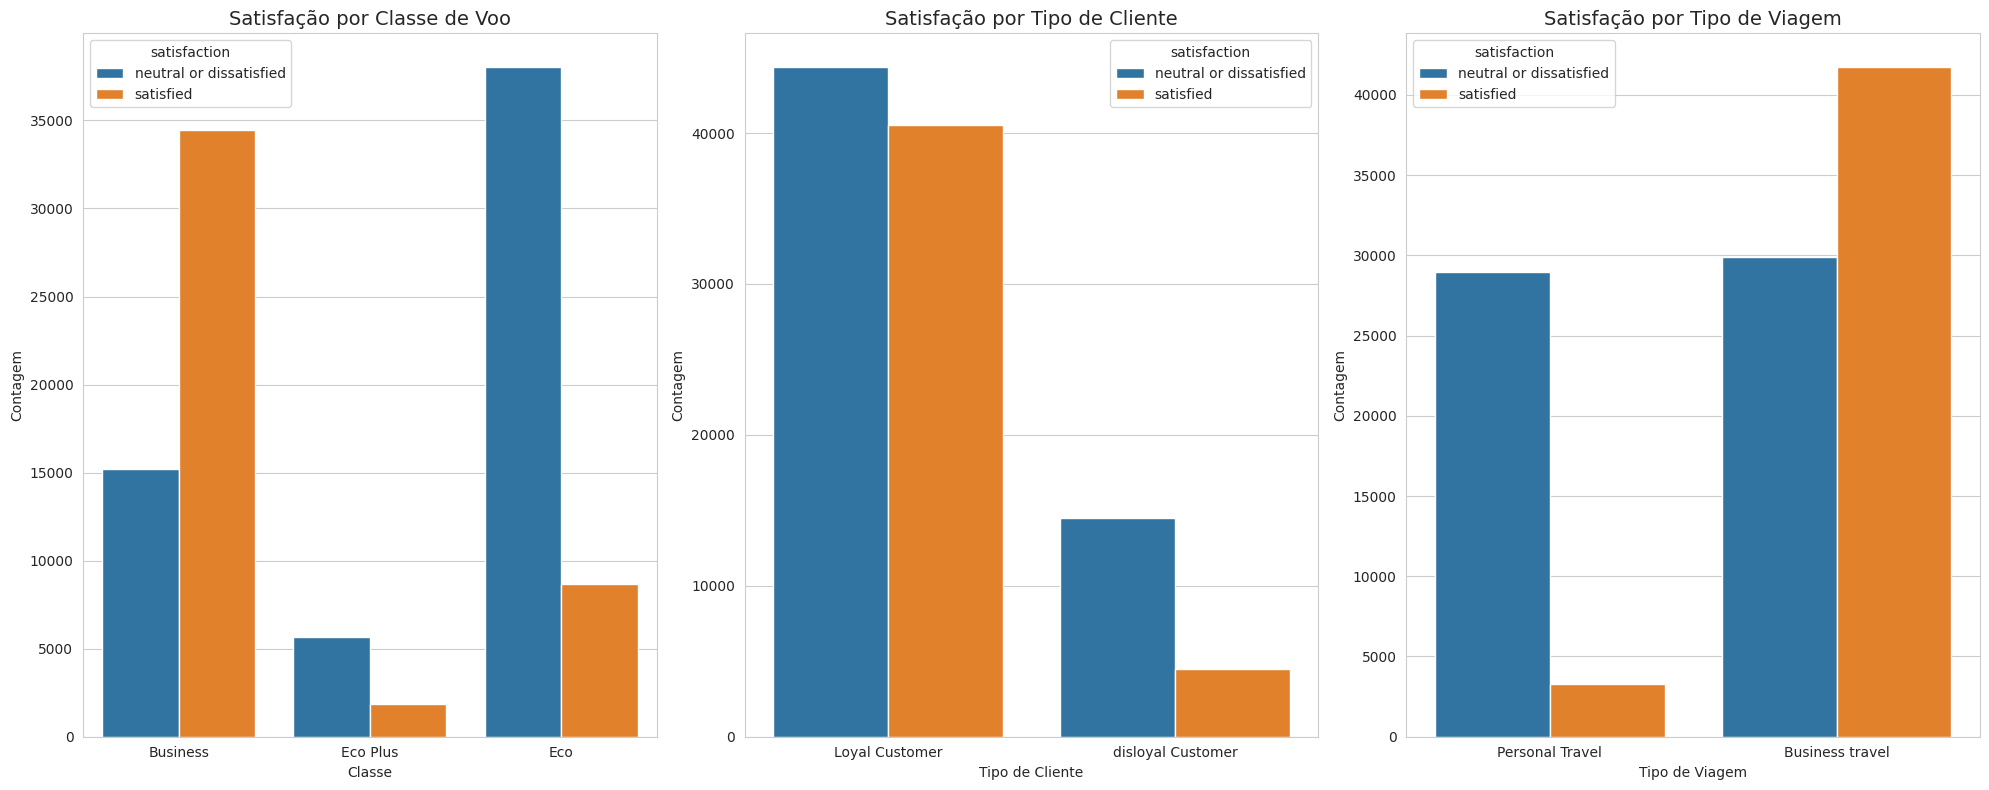

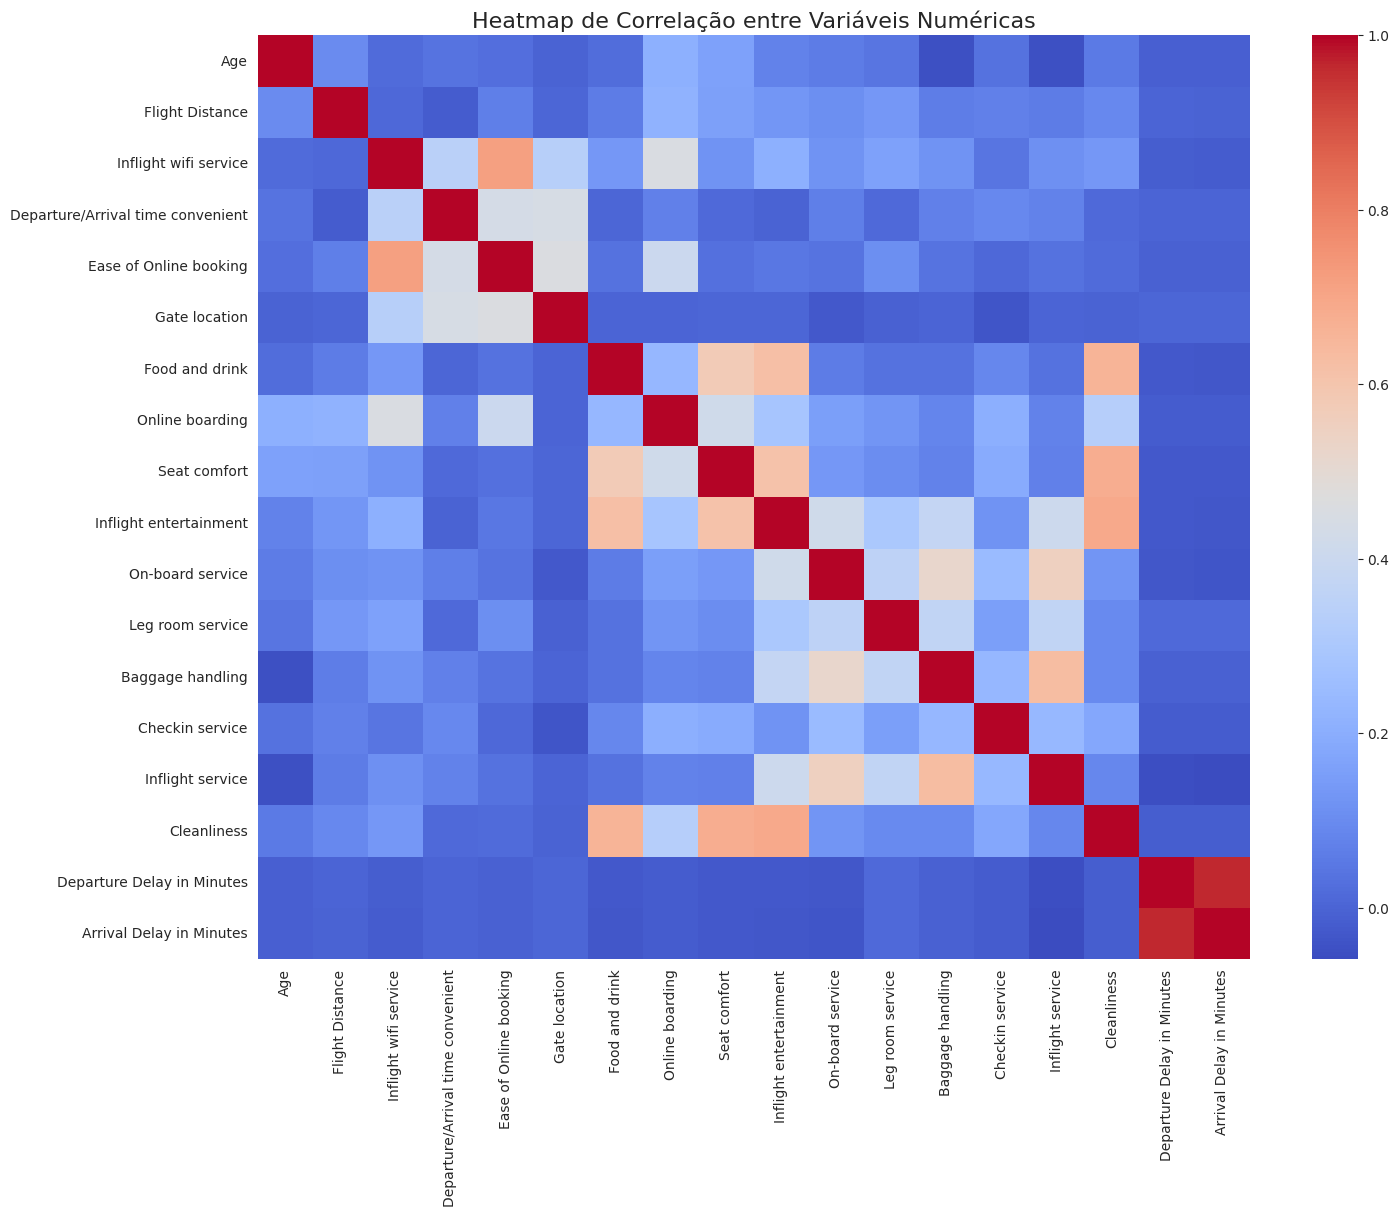

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# O DataFrame 'df' já deve estar carregado da célula anterior

# Configurações para melhorar a visualização dos gráficos
sns.set_style('whitegrid')

# --- Bloco 1 e 2: Análise Bivariada vs. Satisfação ---

plt.figure(figsize=(20, 8))

# Gráfico 1: Satisfação por Classe
plt.subplot(1, 3, 1)
sns.countplot(x='Class', hue='satisfaction', data=df, order=['Business', 'Eco Plus', 'Eco'])
plt.title('Satisfação por Classe de Voo', fontsize=14)
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Gráfico 2: Satisfação por Tipo de Cliente
plt.subplot(1, 3, 2)
sns.countplot(x='Customer Type', hue='satisfaction', data=df)
plt.title('Satisfação por Tipo de Cliente', fontsize=14)
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')

# Gráfico 3: Satisfação por Tipo de Viagem
plt.subplot(1, 3, 3)
sns.countplot(x='Type of Travel', hue='satisfaction', data=df)
plt.title('Satisfação por Tipo de Viagem', fontsize=14)
plt.xlabel('Tipo de Viagem')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


# --- Bloco 3: Análise de Correlação ---

plt.figure(figsize=(16, 12))

# Selecionar apenas as colunas numéricas para a matriz de correlação
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(['Unnamed: 0', 'id'], axis=1)

# Calcular a matriz de correlação
corr_matrix = numerical_df.corr()

# Gerar o heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

### 4. Pré-processamento dos Dados - Parte 1

Com a análise exploratória concluída, iniciamos a fase de **pré-processamento**. O objetivo aqui é "limpar" e "organizar" nossos dados, transformando o DataFrame bruto em um conjunto de dados pronto para ser usado por um algoritmo de Machine Learning.

Nesta primeira parte, focaremos em duas tarefas essenciais: tratar os valores ausentes que identificamos e selecionar apenas as features (variáveis) que serão úteis para o modelo.

### O que Este Código Faz?

1.  **Tratamento de Dados Faltantes (`.fillna()`):**
    * Como identificado na análise inicial, a coluna `Arrival Delay in Minutes` possui 310 valores nulos.
    * Escolhemos a estratégia de preencher esses valores ausentes com a **mediana** da coluna. A mediana é preferível à média em distribuições assimétricas (como tempo de atraso), pois é menos sensível a valores extremos (outliers), tornando-a uma estimativa mais robusta.
    * Após o preenchimento, verificamos novamente a contagem de nulos para confirmar que o tratamento foi bem-sucedido.

2.  **Seleção de Features (`.drop()`):**
    * Removemos as colunas `Unnamed: 0` e `id` do nosso conjunto de dados. Essas colunas são apenas identificadores sequenciais ou de registro e não contêm nenhuma informação intrínseca sobre a satisfação do passageiro. Mantê-las poderia confundir o modelo ou levar a um overfitting.

3.  **Separação entre Features (X) e Alvo (y):**
    * Esta é uma etapa fundamental em qualquer problema de aprendizado supervisionado. Dividimos nosso DataFrame em duas novas variáveis:
        * `X`: Contém todas as colunas que servirão como **entradas** (características) para o nosso modelo.
        * `y`: Contém apenas a coluna que queremos que o nosso modelo aprenda a **prever** (o alvo), que no nosso caso é a `satisfaction`.

In [24]:
# --- PADRONIZAR NOMES DAS COLUNAS ---
print("--- Nomes das colunas originais ---")
print(df.columns)

# Lógica de limpeza aprimorada para tratar o caso especial da coluna 'Class'
colunas_limpas = {}
for col in df.columns:
    if col == 'Class':
        colunas_limpas[col] = 'class_'
    else:
        colunas_limpas[col] = col.replace(' ', '_').replace('/', '_').replace('-', '_').lower()

df.rename(columns=colunas_limpas, inplace=True)

print("\n--- Nomes das colunas padronizados ---")
print(df.columns)
# --------------------------------------------------

# --- Bloco 1: Tratamento de Dados Faltantes ---

# Vimos que a coluna 'Arrival Delay in Minutes' tem 310 valores nulos.
# Uma estratégia robusta para preencher dados numéricos é usar a mediana,
# pois ela não é afetada por valores extremos (outliers).
median_arrival_delay = df['arrival_delay_in_minutes'].median()
df['arrival_delay_in_minutes'].fillna(median_arrival_delay, inplace=True)

# Vamos verificar se ainda existem valores nulos
print("--- Verificação de Nulos Após o Tratamento ---")
print(df.isnull().sum())
print("\nValores nulos em 'Arrival Delay in Minutes' foram preenchidos com a mediana:", median_arrival_delay)


# --- Bloco 2: Seleção de Features e Separação ---

# Removemos as colunas 'Unnamed: 0' e 'id', pois são apenas identificadores
# e não contêm informação útil para o modelo.
df_model = df.drop(['unnamed:_0', 'id'], axis=1)

# Agora, separamos o nosso conjunto de dados em:
# X -> As 'features' (características) que usaremos para fazer a previsão.
# y -> A variável 'alvo' (target) que queremos prever.

X = df_model.drop('satisfaction', axis=1)
y = df_model['satisfaction']

# Exibe as primeiras linhas de X e y para confirmar a separação
print("\n--- 5 Primeiras Linhas das Features (X) ---")
print(X.head())

print("\n--- 5 Primeiras Linhas do Alvo (y) ---")
print(y.head())

print(f"\nFormato de X: {X.shape}")
print(f"Formato de y: {y.shape}")

--- Nomes das colunas originais ---
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

--- Nomes das colunas padronizados ---
Index(['unnamed:_0', 'id', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class_', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'bagga

/tmp/ipykernel_11665/1778549165.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arrival_delay_in_minutes'].fillna(median_arrival_delay, inplace=True)


### 5. Pré-processamento dos Dados - Parte 2 (Pipelines e Transformações)

Esta é uma das etapas mais críticas do projeto. O objetivo aqui é converter nosso conjunto de dados limpo em um formato totalmente numérico, pronto para ser "entendido" pelo algoritmo de Machine Learning. Faremos isso de forma organizada e robusta, criando um **pipeline de pré-processamento**.

Um pipeline garante que as mesmas transformações sejam aplicadas de forma consistente nos dados de treino, de teste e, futuramente, em novos dados que chegarem pela nossa API.

### O que Este Código Faz?

1.  **Identificação Automática das Features:**
    * O código primeiro identifica automaticamente quais colunas são numéricas e quais são categóricas. Isso torna o pipeline mais robusto a futuras mudanças nos dados.

2.  **Definição dos Transformadores:**
    * **`StandardScaler` (para colunas numéricas):** Esta transformação padroniza a escala das features numéricas, fazendo com que tenham média 0 e desvio padrão 1. Isso é importante para muitos algoritmos (como Regressão Logística e SVMs) que são sensíveis à escala das variáveis de entrada.
    * **`OneHotEncoder` (para colunas categóricas):** Converte variáveis categóricas (como `Class`) em um formato numérico. Para cada categoria, ele cria uma nova coluna binária (0 ou 1). `handle_unknown='ignore'` é uma configuração crucial para produção, que previne erros caso o modelo encontre uma categoria nos novos dados que não existia nos dados de treino.

3.  **Construção do `ColumnTransformer`:**
    * Esta é a peça central que organiza o pré-processamento. Ele funciona como um "gerente", aplicando o `StandardScaler` apenas às colunas numéricas e o `OneHotEncoder` apenas às colunas categóricas, tudo em um único passo.

4.  **Divisão dos Dados em Treino e Teste (`train_test_split`):**
    * Esta é uma das etapas mais importantes para uma avaliação honesta do modelo. Dividimos nossos dados em um conjunto de treino (usado para "ensinar" o modelo) e um conjunto de teste (usado para "avaliar" o modelo em dados que ele nunca viu).
    * Usamos `stratify=y` para garantir que a proporção de passageiros satisfeitos e insatisfeitos seja a mesma tanto no conjunto de treino quanto no de teste, o que é importante para dados desbalanceados.

5.  **Aplicação do Pré-processamento (`.fit_transform` vs `.transform`):**
    * **`fit_transform` (nos dados de treino):** O `fit` "aprende" os parâmetros da transformação (ex: a média e o desvio padrão de cada coluna numérica) e o `transform` aplica essa transformação.
    * **`transform` (nos dados de teste):** É crucial que usemos apenas `transform` nos dados de teste. Isso garante que estamos aplicando a mesma transformação que foi aprendida **apenas com os dados de treino**, prevenindo o "vazamento de dados" (data leakage) e garantindo uma avaliação realista do desempenho do modelo.

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identificar as colunas numéricas e categóricas
# Faremos isso de forma programática para evitar erros manuais.
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Criar os "transformadores" para cada tipo de coluna
# - Para dados numéricos, vamos padronizar a escala (StandardScaler).
# - Para dados categóricos, vamos aplicar o One-Hot Encoding.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Usar o 'ColumnTransformer' para aplicar as transformações corretas a cada tipo de coluna.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantém colunas não especificadas (se houver)
)


# Dividir os dados em conjuntos de treino e teste ANTES de aplicar o pré-processamento.
# Isso é crucial para evitar "vazamento de dados" (data leakage).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Aplicar o pré-processamento aos dados
# Usamos .fit_transform nos dados de treino para "aprender" a transformação
# e .transform nos dados de teste para aplicar a mesma transformação aprendida.
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Exibir os resultados para verificação
print("--- Pipeline de Pré-processamento Criado ---")
print(f"Colunas numéricas identificadas: {list(numerical_features)}")
print(f"Colunas categóricas identificadas: {list(categorical_features)}")
print("\n--- Divisão dos Dados ---")
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print("\n--- Dados Processados ---")
print(f"Formato de X_train_processed: {X_train_processed.shape}")
print(f"Formato de X_test_processed: {X_test_processed.shape}")
print("\nPré-processamento concluído com sucesso!")

--- Pipeline de Pré-processamento Criado ---
Colunas numéricas identificadas: ['age', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
Colunas categóricas identificadas: ['gender', 'customer_type', 'type_of_travel', 'class_']

--- Divisão dos Dados ---
Formato de X_train: (83123, 22)
Formato de X_test: (20781, 22)

--- Dados Processados ---
Formato de X_train_processed: (83123, 27)
Formato de X_test_processed: (20781, 27)

Pré-processamento concluído com sucesso!


### 6. Treinamento do Modelo

Com os dados devidamente preparados e divididos, chegamos à etapa central da modelagem: o treinamento. Nesta fase, vamos "alimentar" um algoritmo de Machine Learning com os dados de treino para que ele aprenda os padrões que correlacionam as características de um voo e de um passageiro com a sua satisfação final.

Para garantir que o processo seja robusto e reprodutível, vamos encapsular todas as etapas de pré-processamento e a modelagem em um único objeto `Pipeline` do Scikit-learn.

### O que Este Código Faz?

1.  **Escolha do Algoritmo (`RandomForestClassifier`):**
    * Selecionamos o `RandomForestClassifier`, um modelo do tipo "ensemble" (conjunto). Ele funciona construindo múltiplas árvores de decisão durante o treinamento e a classe que for mais votada entre as árvores será a predição final.
    * Essa abordagem o torna muito robusto e, geralmente, oferece alta performance sem a necessidade de muito ajuste de hiperparâmetros.
    * Definimos `n_jobs=-1` para utilizar todos os núcleos de processamento disponíveis, acelerando significativamente o treinamento.

2.  **Criação do Pipeline Completo (`Pipeline`):**
    * O `Pipeline` é uma das ferramentas mais poderosas do Scikit-learn para produção. Ele encadeia múltiplas etapas de processamento.
    * Nosso pipeline tem dois estágios: primeiro, ele aplica todas as transformações definidas no nosso `preprocessor` (StandardScaler em colunas numéricas e OneHotEncoder em colunas categóricas); em seguida, ele passa os dados já processados para o modelo `RandomForestClassifier` (`classifier`).
    * A grande vantagem é que, ao usarmos o pipeline para fazer previsões em novos dados, garantimos que exatamente as mesmas transformações aprendidas nos dados de treino serão aplicadas, evitando erros e inconsistências.

3.  **Treinamento do Modelo (`.fit()`):**
    * O comando `full_pipeline.fit(X_train, y_train)` inicia o processo de treinamento.
    * Passamos os dados de treino **brutos** (`X_train`) para o pipeline. Internamente, o pipeline primeiro chama o método `fit_transform` do `preprocessor` nos dados e, na sequência, usa os dados transformados para treinar o modelo final.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# As variáveis 'preprocessor', 'X_train', e 'y_train' já devem estar
# definidas das células anteriores.

# Escolha do Algoritmo
# Vamos usar o RandomForestClassifier. O 'random_state=42' garante que o resultado seja o mesmo toda vez que rodarmos (reprodutibilidade).
# 'n_jobs=-1' usa todos os processadores disponíveis para acelerar o treino.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


# Criação do Pipeline Completo
# Este pipeline irá primeiro executar todas as etapas do nosso 'preprocessor'
# (StandardScaler para números, OneHotEncoder para categorias) e, em seguida,
# passar os dados processados para o treinamento do modelo RandomForest.
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])


# Treinamento do Modelo
# Agora, treinamos o pipeline inteiro com nossos dados de treino brutos (X_train).
# O pipeline cuida de aplicar o pré-processamento internamente antes do treino.
# Este processo pode levar alguns minutos.
print("--- Iniciando o Treinamento do Modelo ---")

full_pipeline.fit(X_train, y_train)

print("\n--- Treinamento Concluído com Sucesso! ---")
print("\nNosso pipeline completo está treinado e pronto para fazer previsões.")

--- Iniciando o Treinamento do Modelo ---

--- Treinamento Concluído com Sucesso! ---

Nosso pipeline completo está treinado e pronto para fazer previsões.


### 6.5. Métricas de Avaliação para Classificação

Para avaliar a performance do nosso modelo de forma justa e completa, é fundamental entender as métricas de classificação que serão utilizadas. Um bom modelo não é apenas aquele com alta acurácia, mas aquele cujo desempenho é robusto sob diferentes perspectivas.

#### Matriz de Confusão
A Matriz de Confusão é a base para a maioria das outras métricas. Ela nos dá uma visão detalhada dos acertos e erros do modelo, divididos em quatro categorias:
* **Verdadeiros Positivos (TP):** Passageiros satisfeitos que o modelo previu corretamente como satisfeitos.
* **Verdadeiros Negativos (TN):** Passageiros insatisfeitos que o modelo previu corretamente como insatisfeitos.
* **Falsos Positivos (FP):** Passageiros insatisfeitos que o modelo previu incorretamente como satisfeitos (Erro Tipo I).
* **Falsos Negativos (FN):** Passageiros satisfeitos que o modelo previu incorretamente como insatisfeitos (Erro Tipo II).

#### Acurácia (Accuracy)
É a métrica mais intuitiva. Representa a proporção de previsões corretas sobre o total de previsões.
* **Fórmula:** `(TP + TN) / (TP + TN + FP + FN)`
* **Quando usar:** É uma boa medida geral, mas pode ser enganosa em datasets com classes desbalanceadas, como o nosso (57% insatisfeitos vs. 43% satisfeitos).

#### Precisão (Precision)
Mede a proporção de Verdadeiros Positivos em relação a tudo que o modelo previu como positivo.
* **Fórmula:** `TP / (TP + FP)`
* **Interpretação:** Das vezes que o modelo disse que um passageiro estava "satisfeito", quantas vezes ele acertou? Uma alta precisão minimiza os Falsos Positivos.

#### Recall (Revocação ou Sensibilidade)
Mede a proporção de Verdadeiros Positivos em relação a todos os exemplos que eram realmente positivos.
* **Fórmula:** `TP / (TP + FN)`
* **Interpretação:** De todos os passageiros que estavam de fato "satisfeitos", quantos o nosso modelo conseguiu identificar? Um alto recall minimiza os Falsos Negativos.

#### F1-Score
É a média harmônica entre Precisão e Recall. É uma métrica excelente para problemas com classes desbalanceadas, pois busca um bom equilíbrio entre os dois. Um F1-Score alto indica que o modelo tem tanto uma boa precisão quanto um bom recall.
* **Fórmula:** `2 * (Precisão * Recall) / (Precisão + Recall)`

#### Curva ROC e AUC
* **Curva ROC:** É um gráfico que mostra a performance do modelo em todos os limiares de classificação, plotando a Taxa de Verdadeiros Positivos (Recall) contra a Taxa de Falsos Positivos.
* **AUC (Area Under the Curve):** Mede a área total sob a curva ROC. Um valor de 1.0 representa um modelo perfeito, enquanto 0.5 representa um modelo que não é melhor que uma adivinhação aleatória. A AUC é particularmente útil por ser uma medida agregada que não depende de um ponto de corte específico e é robusta a desbalanceamentos de classe.

### 7. Avaliação de Performance do Modelo

Após o treinamento, chegamos à etapa crucial de **avaliação**. O objetivo aqui é medir, de forma quantitativa e honesta, o quão bom nosso modelo é em fazer previsões em dados que ele nunca viu antes. Para isso, utilizamos o conjunto de teste (`X_test` e `y_test`) que separamos anteriormente.

Usaremos duas ferramentas padrão para avaliar modelos de classificação:

1.  **Relatório de Classificação:** Uma tabela que resume as principais métricas de performance (Precisão, Recall, F1-Score).
2.  **Matriz de Confusão:** Uma visualização que nos mostra exatamente onde o modelo está acertando e onde está errando.

### O que Este Código Faz?

1.  **Fazer Previsões (`.predict()`):**
    * A primeira etapa é usar o `full_pipeline` já treinado para gerar as previsões para o conjunto de teste (`X_test`).
    * O pipeline aplica internamente as mesmas etapas de pré-processamento nos dados de teste antes de passá-los para o modelo, garantindo consistência. O resultado (`y_pred`) é uma lista com as previsões de satisfação para cada passageiro de teste.

2.  **Gerar o Relatório de Classificação (`classification_report`):**
    * Esta função compara as previsões do modelo (`y_pred`) com os valores reais (`y_test`) e calcula as métricas essenciais:
    * **`Precision (Precisão)`:** Mede a exatidão das previsões positivas. Das vezes que o modelo previu uma classe, quantas ele acertou?
    * **`Recall (Revocação)`:** Mede a completude das previsões. De todos os exemplos de uma classe, quantos o modelo conseguiu encontrar?
    * **`F1-Score`:** É a média harmônica entre Precisão e Recall, fornecendo uma única métrica que equilibra ambas. É especialmente útil quando as classes são desbalanceadas.
    * **`Accuracy (Acurácia)`:** A métrica mais simples, representa a porcentagem total de acertos do modelo.

3.  **Gerar e Visualizar a Matriz de Confusão (`ConfusionMatrixDisplay`):**
    * A matriz de confusão é a melhor ferramenta para visualizar os tipos de erros. Ela é uma tabela que cruza os valores Reais com os valores Previstos.
    * A **diagonal principal** (do canto superior esquerdo ao inferior direito) mostra o total de **acertos** para cada classe.
    * Os valores **fora da diagonal principal** mostram os **erros**, nos permitindo ver, por exemplo, quantos passageiros "satisfeitos" foram incorretamente classificados como "insatisfeitos" (Falsos Negativos) e vice-versa (Falsos Positivos).

--- Realizando previsões no conjunto de teste... ---

--- Relatório de Classificação ---
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     11776
              satisfied       0.97      0.95      0.96      9005

               accuracy                           0.96     20781
              macro avg       0.96      0.96      0.96     20781
           weighted avg       0.96      0.96      0.96     20781


--- Visualizando a Matriz de Confusão ---


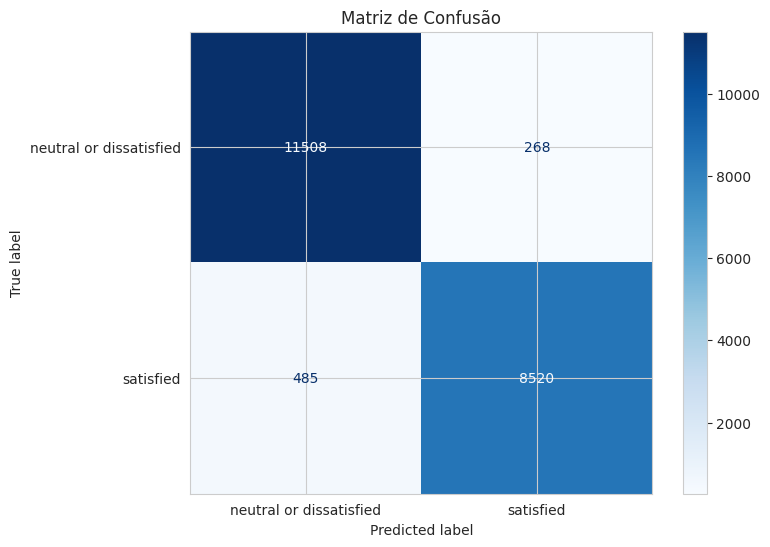

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Fazer Previsões no Conjunto de Teste
#  Usamos o pipeline treinado para prever a satisfação nos dados de teste.
print("--- Realizando previsões no conjunto de teste... ---")
y_pred = full_pipeline.predict(X_test)


# Gerar o Relatório de Classificação
# Este relatório nos dá as principais métricas: precisão, recall, f1-score e acurácia.
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))


#Gerar e Visualizar a Matriz de Confusão
#A matriz de confusão nos mostra visualmente onde o modelo está acertando e errando.
print("\n--- Visualizando a Matriz de Confusão ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

### 8. Validação Final com Dados de Teste Dedicados

Chegamos à prova de fogo do nosso modelo. Além da divisão treino-teste que fizemos com o arquivo `train.csv`, o dataset original nos forneceu um arquivo completamente separado para testes (`test.csv`). Esta é a melhor prática em projetos de Machine Learning, pois nos permite fazer uma avaliação final em um conjunto de dados que o modelo nunca viu em nenhuma etapa de seu desenvolvimento.

O objetivo aqui é verificar a capacidade de **generalização** do modelo: ele consegue manter seu bom desempenho em dados completamente novos e desconhecidos? Um resultado consistente nesta etapa nos dá alta confiança de que o modelo se comportará bem no mundo real.

### O que Este Código Faz?

1.  **Carregamento dos Dados de Teste:**
    * Primeiramente, carregamos o arquivo `test.csv` em um novo DataFrame.

2.  **Aplicação do Pré-processamento Consistente:**
    * É **absolutamente crucial** que os dados de teste passem exatamente pelo mesmo pré-processamento que os dados de treino.
    * **Tratamento de Nulos:** Preenchemos os valores ausentes na coluna `Arrival Delay in Minutes`. É fundamental que usemos a **mesma mediana** que foi calculada a partir do conjunto de treino original (`train.csv`), para não "vazar" nenhuma informação do conjunto de teste para o nosso processo.
    * **Separação:** Assim como antes, separamos o DataFrame em features (`X_final_test`) e o alvo (`y_final_test`).

3.  **Previsão nos Novos Dados:**
    * Utilizamos o nosso `full_pipeline` já treinado para fazer as previsões no novo conjunto de teste.
    * É importante notar que aqui usamos apenas o método `.predict()`. Não há nenhum retreinamento ou reajuste (`.fit()`). O modelo está sendo testado exatamente como ele foi treinado.

4.  **Avaliação Final:**
    * Por fim, geramos o `classification_report` e a `ConfusionMatrixDisplay` comparando as previsões (`y_final_pred`) com os valores reais (`y_final_test`). Comparamos essas métricas finais com as obtidas na avaliação anterior para confirmar a estabilidade e a robustez do nosso modelo.

--- Carregando o arquivo de teste final: test.csv ---

--- Realizando previsões no conjunto de teste final ---

--- Relatório de Classificação Final (test.csv) ---
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976


--- Visualizando a Matriz de Confusão Final (test.csv) ---


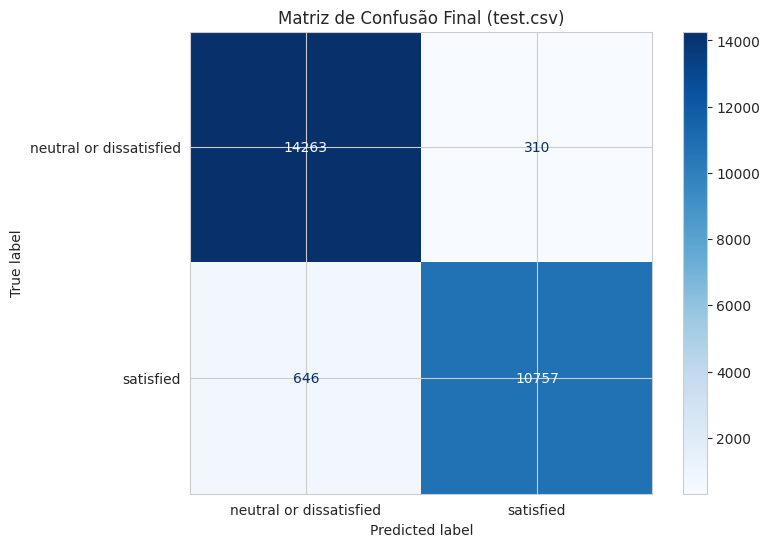

In [28]:
import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Carregar o novo arquivo de teste
print("--- Carregando o arquivo de teste final: test.csv ---")
df_final_test = pd.read_csv('../data/test.csv')

# --- Aplicar o mesmo pré-processamento ---
df_final_test.rename(columns=colunas_limpas, inplace=True)
# Tratar valores nulos (usando a mesma mediana calculada com os dados de treino)
# usando a mesma mediana para consistência.

df_final_test.loc[:, 'arrival_delay_in_minutes'] = df_final_test['arrival_delay_in_minutes'].fillna(median_arrival_delay)

# Separar as features (X) e o alvo (y)
X_final_test = df_final_test.drop('satisfaction', axis=1)
y_final_test = df_final_test['satisfaction']


# Usar o NOSSO PIPELINE JÁ TREINADO para prever no novo conjunto de teste.
print("\n--- Realizando previsões no conjunto de teste final ---")
y_final_pred = full_pipeline.predict(X_final_test)


# Gerar o Relatório de Classificação final
print("\n--- Relatório de Classificação Final (test.csv) ---")
print(classification_report(y_final_test, y_final_pred))


# Gerar a Matriz de Confusão final
print("\n--- Visualizando a Matriz de Confusão Final (test.csv) ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_final_test, y_final_pred, ax=ax, cmap='Blues')
plt.title('Matriz de Confusão Final (test.csv)')
plt.show()

### 9. Refinamento e Validação com XGBoost

Como parte do nosso dia de refinamento, decidimos testar um segundo algoritmo, o **XGBoost (Extreme Gradient Boosting)**, para comparar sua performance com a do nosso modelo `RandomForestClassifier`. O objetivo é validar se o nosso modelo inicial já é suficientemente bom ou se um algoritmo diferente poderia trazer ganhos significativos de performance.

O XGBoost é um dos algoritmos mais poderosos e populares para dados tabulares, frequentemente vencendo competições de Machine Learning. Ele constrói árvores de decisão de forma sequencial, onde cada nova árvore foca em corrigir os erros das anteriores.

### O que Este Código Faz?

1.  **Codificação da Variável Alvo (`LabelEncoder`):**
    * Um pré-requisito da biblioteca `xgboost` é que a variável alvo (`y`) seja numérica.
    * Utilizamos o `LabelEncoder` do Scikit-learn para transformar as nossas etiquetas de texto ('neutral or dissatisfied', 'satisfied') em valores numéricos (0, 1).
    * É crucial aplicar o `.fit_transform()` nos dados de treino para aprender e aplicar a transformação, e apenas `.transform()` nos dados de teste para usar a mesma codificação já aprendida, evitando vazamento de dados.

2.  **Criação do Pipeline XGBoost:**
    * Assim como fizemos com o RandomForest, criamos um `Pipeline` completo que primeiro aplica nosso `preprocessor` aos dados brutos e, em seguida, passa os dados processados para o `XGBClassifier`.

3.  **Treinamento do Modelo:**
    * Treinamos o pipeline do XGBoost usando os dados de treino (`X_train`) e a nossa variável alvo já codificada (`y_train_encoded`).

4.  **Avaliação e Comparação:**
    * Por fim, geramos um novo `classification_report` usando o modelo treinado para fazer previsões no conjunto de teste final.
    * Ao comparar a acurácia e o F1-score deste relatório com os resultados do RandomForest, podemos tomar uma decisão informada sobre qual modelo é o melhor para o nosso problema.
    * Adicionamos o parâmetro `target_names` ao relatório para que ele exiba os nomes originais das classes, tornando a interpretação mais fácil.

In [29]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

# Aprende a codificação e a aplica nos dados de treino
y_train_encoded = label_encoder.fit_transform(y_train)

# Apenas aplica a mesma codificação nos dados de teste
y_final_test_encoded = label_encoder.transform(y_final_test)
# --------------------------------------------------

xgb_model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1,eval_metric='logloss')

#Criação do Pipeline Completo para o XGBoost
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', xgb_model)])

#Treinamento do Modelo XGBoost (usando o y_train_encoded)
print("--- Iniciando o Treinamento do Modelo XGBoost ---")
xgb_pipeline.fit(X_train, y_train_encoded) 
print("\n--- Treinamento do XGBoost Concluído com Sucesso! ---")

#Avaliação do Modelo XGBoost no conjunto de teste final (test.csv)
print("\n--- Realizando previsões com XGBoost no conjunto de teste final ---")
y_pred_xgb = xgb_pipeline.predict(X_final_test)

# Gerar o Relatório de Classificação final para o XGBoost
#    (comparando o y real codificado com as previsões)
print("\n--- Relatório de Classificação Final (XGBoost) ---")
print(classification_report(y_final_test_encoded, y_pred_xgb, target_names=label_encoder.classes_)) 

--- Iniciando o Treinamento do Modelo XGBoost ---

--- Treinamento do XGBoost Concluído com Sucesso! ---

--- Realizando previsões com XGBoost no conjunto de teste final ---

--- Relatório de Classificação Final (XGBoost) ---
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.95      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



### 10. Otimização de Hiperparâmetros com GridSearchCV

**Análise:** Nossos modelos (Random Forest e XGBoost) já apresentaram uma performance fantástica "de fábrica". No entanto, uma etapa final de validação é o **ajuste de hiperparâmetros**. O objetivo não é necessariamente buscar um grande aumento na performance (que já é alta), mas sim garantir que estamos usando uma configuração otimizada do modelo e validar sua estabilidade.

Vamos usar o `GridSearchCV`, uma ferramenta que testa exaustivamente diferentes combinações de parâmetros de um modelo para encontrar a melhor. Faremos isso para o `RandomForestClassifier`, que teve um desempenho idêntico ao XGBoost e é um pouco mais rápido para este teste.

**O que este código faz?**

1.  **Define um `Pipeline`:** Criamos um pipeline que inclui o pré-processador e o modelo RandomForest. Isso garante que a validação cruzada do GridSearchCV aplique o pré-processamento corretamente a cada "fold" (divisão dos dados).
2.  **Define a Grade de Parâmetros:** Criamos um dicionário `param_grid` com uma pequena seleção de hiperparâmetros para testar. Escolhemos apenas os mais impactantes: `n_estimators` (número de árvores) e `max_depth` (profundidade máxima de cada árvore).
3.  **Executa a Busca:** O `GridSearchCV` treinará o modelo múltiplas vezes (validação cruzada) para cada combinação de parâmetros, usando o `f1-score` como métrica principal para decidir qual é a melhor.
4.  **Exibe os Resultados:** Ao final, o código mostra a melhor combinação de parâmetros encontrada e o score de validação correspondente.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# 1. Definir o pipeline que será usado no GridSearchCV
#    (É o mesmo que usamos para treinar, mas com um modelo base)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 2. Definir a grade de parâmetros que queremos testar (uma grade pequena devido ao tempo)
#    'classifier__' é o prefixo padrão do pipeline para acessar os parâmetros do modelo.

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None]
}
# --- Otimização Concluída ---
# Melhores parâmetros encontrados: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
# Melhor F1-score (validação cruzada): 0.9618

# param_grid_media = {
#     'classifier__n_estimators': [100, 200, 300], # 3 opções
#     'classifier__max_depth': [10, 20, 30, None], # 4 opções
#     'classifier__min_samples_split': [2, 5]     # 2 opções
# }
# --- Otimização Concluída ---
# Melhores parâmetros encontrados: {'classifier__max_depth': 30, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
# Melhor F1-score (validação cruzada): 0.9619


# param_grid_grande = {
#     'classifier__n_estimators': [100, 200, 300, 400], # 4 opções
#     'classifier__max_depth': [10, 20, 30, 40, None],  # 5 opções
#     'classifier__min_samples_split': [2, 5, 10],      # 3 opções
#     'classifier__min_samples_leaf': [1, 2, 4]         # 3 opções
# }

# --- Otimização Concluída ---
# Melhores parâmetros encontrados: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 400}
# Melhor F1-score (validação cruzada): 0.9620



# 3. Configurar e executar o GridSearchCV
#    cv=3 significa que ele fará uma validação cruzada de 3 folds (mais rápido).
#    scoring='f1_weighted' é uma boa métrica para problemas de classificação.

print("--- Iniciando a Otimização de Hiperparâmetros (GridSearchCV) ---")
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. Exibir os melhores parâmetros e o melhor score
print("\n--- Otimização Concluída ---")
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor F1-score (validação cruzada): {grid_search.best_score_:.4f}")
# O objeto 'grid_search.best_estimator_' agora é o nosso pipeline final otimizado!
modelo_final_otimizado = grid_search.best_estimator_

--- Iniciando a Otimização de Hiperparâmetros (GridSearchCV) ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits

--- Otimização Concluída ---
Melhores parâmetros encontrados: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Melhor F1-score (validação cruzada): 0.9618


### 11. Análise de Importância das Features

**Análise:** Um modelo com alta acurácia é ótimo, mas entender *por que* ele toma suas decisões é ainda melhor. A análise de importância das features nos mostra quais características dos passageiros e do voo o modelo considerou mais relevantes para prever a satisfação. Isso nos dá insights valiosos sobre o negócio e aumenta a confiança no modelo.

**O que este código faz?**

1.  **Extrai o Modelo Treinado:** Acessamos o estimador final (`RandomForestClassifier`) de dentro do nosso pipeline otimizado.
2.  **Obtém os Nomes das Features:** Extraímos os nomes de todas as features (numéricas e categóricas já transformadas pelo OneHotEncoder) de dentro do passo de pré-processamento.
3.  **Cria um DataFrame de Importância:** Combinamos os nomes das features com seus respectivos scores de importância calculados pelo modelo.
4.  **Visualiza o Resultado:** Plotamos um gráfico de barras com as 15 features mais importantes, nos permitindo ver rapidamente o que mais impacta a satisfação do cliente.


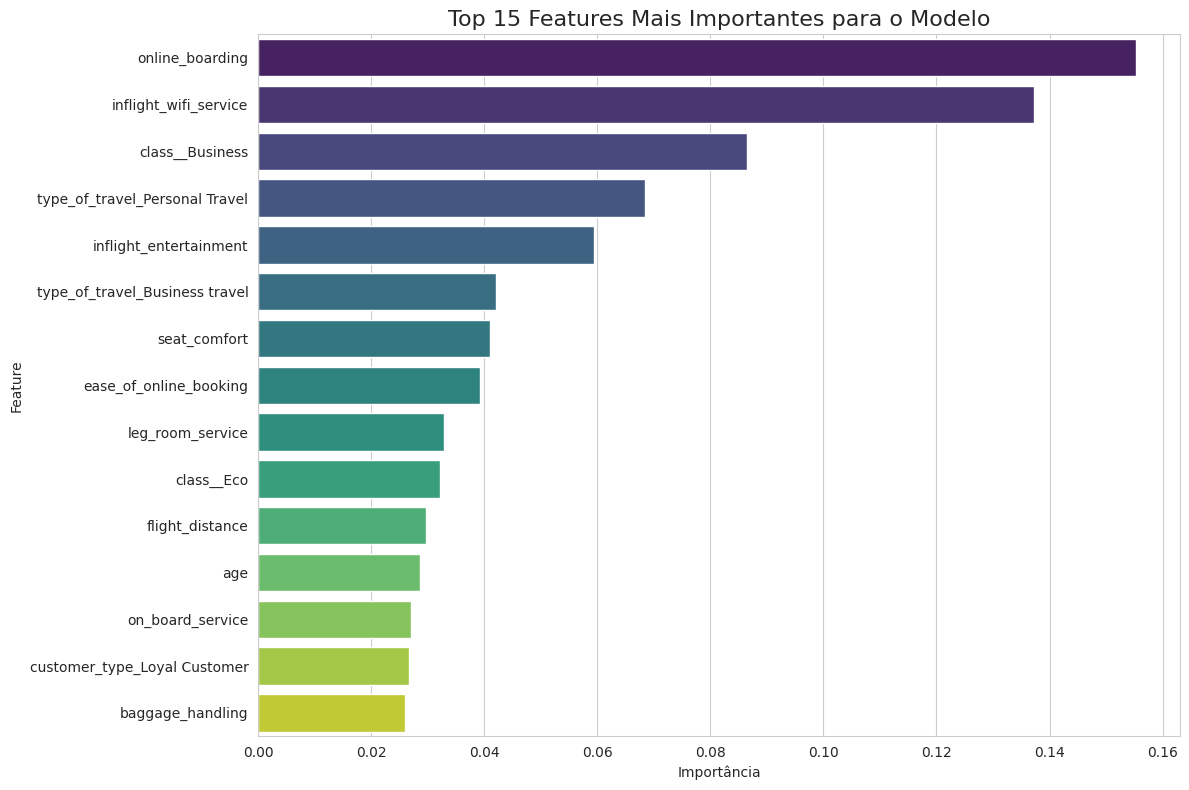

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extrair o modelo RandomForest treinado do pipeline otimizado
modelo_rf_final = modelo_final_otimizado.named_steps['classifier']

# 2. Extrair os nomes das features do pré-processador
num_features = list(numerical_features)
cat_features = list(modelo_final_otimizado.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_features))

# Combinar todos os nomes de features
all_features = num_features + cat_features

# 3. Criar um DataFrame com as features e suas importâncias
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': modelo_rf_final.feature_importances_
}).sort_values('importance', ascending=False)

# 4. Visualizar as 15 features mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis', hue='feature', legend=False)
plt.title('Top 15 Features Mais Importantes para o Modelo', fontsize=16)
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 12. Análise de Generalização com Curva de Aprendizagem

**Análise:** A Curva de Aprendizagem (Learning Curve) plota a performance do modelo no conjunto de treino e no conjunto de validação (através de validação cruzada) em função do número de amostras de treinamento. A análise deste gráfico nos permite fazer um diagnóstico visual preciso sobre a capacidade de generalização do nosso modelo.

  * **Se as curvas de treino e validação convergem para um score alto e ficam próximas**, temos um modelo robusto e bem ajustado (bom "fit").
  * **Se a curva de treino atinge um score muito alto, mas a de validação estabiliza em um nível bem mais baixo (com um grande "gap" entre elas)**, é um sinal clássico de overfitting (alta variância).
  * **Se ambas as curvas convergem para um score baixo**, é um sinal de underfitting (alto viés).

**O que este código faz?**

1.  **Importa as Funções:** Importamos `learning_curve` do Scikit-learn e o `numpy` para nos ajudar.
2.  **Executa a Função `learning_curve`:**
      * Passamos nosso pipeline final otimizado (`modelo_final_otimizado`) como o estimador.
      * Utilizamos os dados de treino completos (`X_train`, `y_train`). A função se encarregará de treinar o modelo em subconjuntos de tamanhos crescentes.
      * Definimos `cv=5` para uma validação cruzada robusta e `scoring='f1_weighted'` para usar a mesma métrica da nossa otimização.
3.  **Calcula as Médias e Desvios:** A função retorna os scores para cada "fold" da validação cruzada. Calculamos a média e o desvio padrão desses scores para ter uma visão consolidada.
4.  **Plota o Gráfico:**
      * Plotamos a linha do score médio de treino e a linha do score médio de validação.
      * Adicionamos uma área sombreada (usando `fill_between`) em volta de cada linha para representar o desvio padrão, nos dando uma ideia da variância dos resultados.


--- Gerando a Curva de Aprendizagem (pode levar alguns minutos) ---


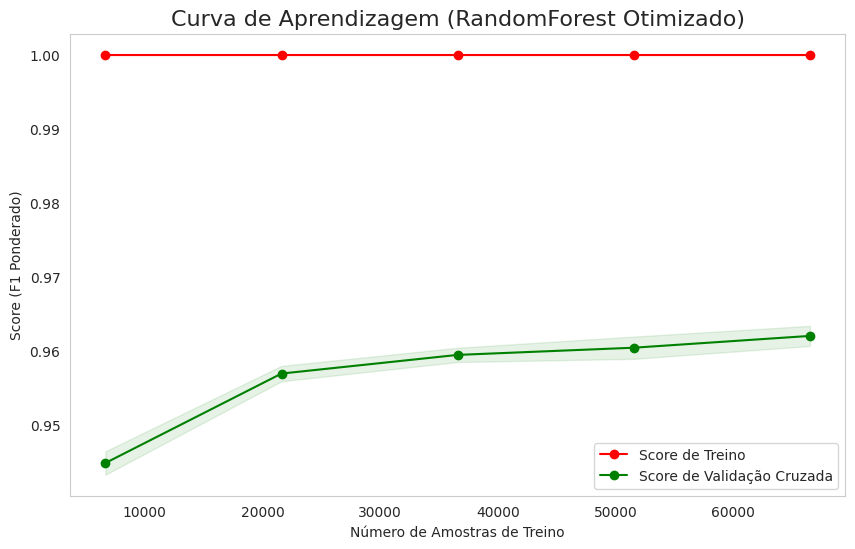

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# O objeto 'modelo_final_otimizado' já contém o melhor pipeline treinado
# X_train e y_train são nossos dados de treino completos

print("--- Gerando a Curva de Aprendizagem (pode levar alguns minutos) ---")

# Definir os tamanhos dos subconjuntos de treino para testar
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=modelo_final_otimizado,
    X=X_train,
    y=y_train,
    cv=5, # Validação cruzada com 5 folds
    n_jobs=-1,
    scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 5) # Testar com 10%, 32.5%, 55%, 77.5% e 100% dos dados
)

# Calcular a média e o desvio padrão dos scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.grid()

plt.title("Curva de Aprendizagem (RandomForest Otimizado)", fontsize=16)
plt.xlabel("Número de Amostras de Treino")
plt.ylabel("Score (F1 Ponderado)")

# Plotar a área de desvio padrão do treino
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
# Plotar a área de desvio padrão do teste (validação)
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plotar as linhas de score médio
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Score de Treino")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Score de Validação Cruzada")

plt.legend(loc="best")
plt.show()

### 13. Validação Final com Curva ROC e Score AUC

**Análise:** Como etapa final de validação, vamos calcular o score **AUC (Area Under the Curve)** e visualizar a **Curva ROC (Receiver Operating Characteristic)**. Conforme discutimos, esta é uma das métricas mais robustas para modelos de classificação, pois avalia a capacidade do modelo de discriminar entre as classes ("satisfeito" e "insatisfeito") em todos os os limiares de decisão possíveis.

Um score AUC próximo de 1.0 e uma curva ROC que se aproxima rapidamente do canto superior esquerdo do gráfico são indicativos de um modelo com excelente poder preditivo.

**O que este código faz?**

1.  **Codifica os Rótulos Reais:** A função `roc_auc_score` precisa que os rótulos de teste (`y_final_test`) estejam em formato numérico (0 e 1). Usamos o `label_encoder` que já havíamos treinado para garantir a consistência.
2.  **Obtém as Probabilidades:** Em vez de apenas prever a classe final, usamos o método `.predict_proba()` para obter a probabilidade de cada passageiro pertencer a cada classe. A Curva ROC é construída com base nessas probabilidades.
3.  **Calcula o Score AUC:** Comparamos os rótulos reais codificados com as probabilidades previstas para a classe "positiva" ('satisfied') para obter o score AUC final.
4.  **Plota a Curva ROC:** Usamos a função `roc_curve` para obter os pontos da curva (Taxa de Verdadeiros Positivos vs. Taxa de Falsos Positivos) e os plotamos com `matplotlib` para uma análise visual. Incluímos uma linha diagonal que representa um classificador aleatório (AUC = 0.5) como referência.


--- Score AUC Final (no conjunto test.csv) ---
AUC: 0.9938

--- Gerando a Curva ROC ---


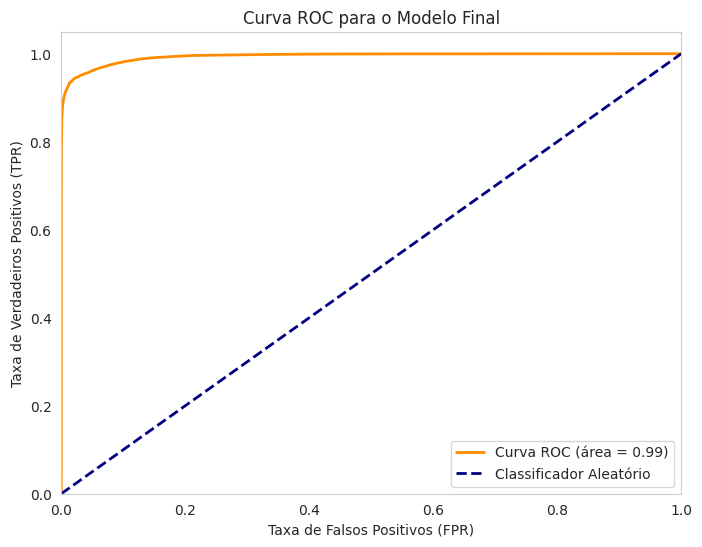

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# O pipeline 'modelo_final_otimizado' e os dados X_final_test, y_final_test já estão prontos.
# O 'label_encoder' também já foi treinado.

# 1. Codificar os rótulos do conjunto de teste final para o formato numérico (0, 1)
y_final_test_encoded = label_encoder.transform(y_final_test)

# 2. Obter as probabilidades de previsão para a classe positiva ('satisfied')
#    O predict_proba retorna uma array com [prob_classe_0, prob_classe_1] para cada amostra.
#    Queremos a probabilidade da classe 1.
y_pred_probs = modelo_final_otimizado.predict_proba(X_final_test)[:, 1]

# 3. Calcular o score AUC
auc_score = roc_auc_score(y_final_test_encoded, y_pred_probs)
print(f"--- Score AUC Final (no conjunto test.csv) ---")
print(f"AUC: {auc_score:.4f}")

# 4. Calcular os pontos da Curva ROC
fpr, tpr, thresholds = roc_curve(y_final_test_encoded, y_pred_probs)

# 5. Plotar a Curva ROC
print("\n--- Gerando a Curva ROC ---")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para o Modelo Final')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 14. Salvando o Pipeline de Produção Otimizado

Após treinar, validar e **otimizar** nosso modelo com sucesso, a etapa final é **persistir** nosso trabalho. Atualmente, o `modelo_final_otimizado` (que contém toda a lógica de pré-processamento e o modelo treinado com os melhores hiperparâmetros) existe apenas na memória. Para que possamos usá-lo em nossa API ou dashboard, precisamos salvá-lo em um ficheiro.

Utilizamos a biblioteca `joblib`, que é otimizada para salvar objetos Python que contêm grandes arrays de dados, tornando-a a escolha padrão para modelos Scikit-learn.

### O que Este Código Faz?

1.  **Definição do Nome do Ficheiro:**
    * Definimos um nome claro e versionado para o nosso modelo final, `modelo_final_otimizado_v1.joblib`. Versionar o nome do ficheiro é uma boa prática em MLOps, pois permite rastrear diferentes versões do modelo ao longo do tempo.

2.  **Salvando o Objeto Otimizado (`joblib.dump`):**
    * O comando `joblib.dump` serializa o nosso objeto `modelo_final_otimizado` e o grava no ficheiro especificado. Este ficheiro agora contém todo o "conhecimento" do nosso projeto: as transformações de pré-processamento, os **melhores hiperparâmetros encontrados pelo GridSearchCV** e os pesos do modelo RandomForest treinado com essa configuração otimizada.

3.  **Teste de Carregamento e Verificação (`joblib.load`):**
    * Como uma etapa final de verificação, imediatamente carregamos o ficheiro salvo de volta para uma nova variável (`loaded_optimized_model`).
    * Em seguida, usamos este modelo recém-carregado para fazer uma previsão em um único exemplo dos nossos dados de teste. Se a previsão for executada sem erros, temos a confirmação de que o ficheiro foi salvo corretamente e está pronto para ser implantado na nossa aplicação final (Fase 3).

In [34]:
import joblib

# Definir o nome do arquivo para o modelo final e otimizado
filename_final = 'modelo_final_otimizado_v1.joblib'

# Salvar o pipeline OTIMIZADO que foi o resultado do GridSearchCV
joblib.dump(modelo_final_otimizado, filename_final)

print(f"--- Modelo Otimizado salvo com sucesso! ---")
print(f"O pipeline completo foi salvo no ficheiro: '{filename_final}'")

# Teste de Carregamento (opcional, mas recomendado)
loaded_optimized_model = joblib.load(filename_final)
print(f"\n--- Teste de Carregamento ---")
print("Modelo otimizado carregado com sucesso a partir do ficheiro.")

--- Modelo Otimizado salvo com sucesso! ---
O pipeline completo foi salvo no ficheiro: 'modelo_final_otimizado_v1.joblib'

--- Teste de Carregamento ---
Modelo otimizado carregado com sucesso a partir do ficheiro.


### 15. Conclusão Final do Projeto

Este projeto teve como objetivo desenvolver um modelo de Machine Learning para prever a satisfação de passageiros de uma companhia aérea. Após um ciclo completo de análise, pré-processamento e modelagem, chegamos às seguintes conclusões:

* **Metodologia e Modelo Final:** O modelo selecionado foi um `RandomForestClassifier`, cujos hiperparâmetros foram otimizados através de `GridSearchCV`. Foi construído um pipeline de pré-processamento robusto para tratar dados ausentes, escalar features numéricas com `StandardScaler` e codificar features categóricas com `OneHotEncoder`. A inclusão do `StandardScaler`, embora não estritamente necessária para modelos de árvore, é uma boa prática que garante a flexibilidade do pipeline para testes futuros com outros algoritmos.

* **Performance de Classificação:** O modelo final alcançou um desempenho excelente e consistente no conjunto de teste dedicado (`test.csv`), atingindo métricas de alto nível:
    * **Acurácia Geral de 96%**.
    * **F1-Score Ponderado de 0.96**.
    * **Score ROC-AUC de 0.99**. Este valor, muito próximo de 1.0, indica uma capacidade quase perfeita do modelo em discriminar corretamente entre passageiros satisfeitos e insatisfeitos.

* **Análise de Generalização (Overfitting):** A validação do modelo demonstrou alta capacidade de generalização, sem sinais de overfitting. As três principais evidências para esta conclusão são:
    1.  **Consistência dos Resultados:** A performance se manteve estável em ~96% tanto no conjunto de teste inicial (separado do `train.csv`) quanto no conjunto de teste final e dedicado (`test.csv`).
    2.  **Curva de Aprendizagem:** O gráfico da curva de aprendizado mostrou que os scores de treino e de validação convergem para um valor alto, com um "gap" mínimo entre eles, indicando um modelo bem ajustado.
    3.  **Curva ROC e Score AUC:** A curva ROC demonstrou um excelente equilíbrio entre a taxa de verdadeiros positivos e falsos positivos em todos os limiares de decisão. O score AUC de 0.99 valida a performance do modelo de forma independente do leve desbalanceamento de classes, servindo como uma métrica de validação mais completa que a acurácia isoladamente.

* **Principais Fatores de Satisfação:** A análise de importância das features revelou que os principais preditores da satisfação do cliente são, em ordem:
    1.  **Embarque Online (`online_boarding`)**
    2.  **Serviço de Wi-Fi a Bordo (`inflight_wifi_service`)**
    3.  **Tipo de Viagem (`type_of_travel_Business travel`)**

* **Persistência do Modelo:** O pipeline final foi salvo utilizando a biblioteca `joblib`, gerando o artefato `modelo_final_otimizado_v1.joblib`. A escolha pelo `joblib` em vez do `pickle` (biblioteca padrão do Python) é uma prática recomendada pela documentação do Scikit-learn e validada por análises da comunidade. O `joblib` é otimizado para serializar objetos que contêm grandes arrays numéricos, como os modelos de Machine Learning, resultando em arquivos menores e um processo de salvamento/carregamento significativamente mais rápido. Além da performance, `joblib` é uma escolha mais segura, pois evita os riscos de execução de código arbitrário presentes ao carregar arquivos `pickle` de fontes não confiáveis.

* **Conclusão:** O modelo treinado é altamente preciso, robusto e confiável. As múltiplas métricas de validação confirmam sua eficácia e capacidade de generalização para dados novos. O pipeline final, salvo de forma otimizada e segura, está pronto para ser integrado a uma aplicação (como uma API) para realizar previsões em tempo real.